In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,r2_score,max_error,mean_absolute_error,median_absolute_error,mean_squared_error
from math import sqrt
import joblib
%matplotlib inline

In [63]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [64]:
init_notebook_mode(connected=True)
cf.go_offline()

In [65]:
df=pd.read_csv('ALPHAPLUSC2024.csv')

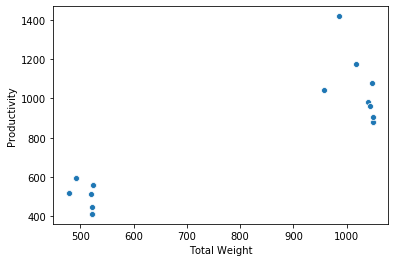

In [66]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [67]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.000000,19.000000,19.000000,16.000000
mean,569.526316,194387.105263,11.500000,12.195263,753.301105,0.007895,0.000789,0.0,0.089474,0.103684,760.873684,11448.869375
std,219.854843,3772.179401,12.793748,13.501905,267.678041,0.004189,0.000419,0.0,0.390007,0.322890,296.392359,5432.724395
min,222.000000,191006.000000,0.000000,0.000000,478.000000,0.000000,0.000000,0.0,0.000000,0.000000,411.560000,6287.755000
25%,421.500000,191797.000000,0.000000,0.000000,520.676500,0.010000,0.001000,0.0,0.000000,0.000000,520.670000,8482.695000
50%,487.000000,192685.000000,0.000000,0.000000,523.773000,0.010000,0.001000,0.0,0.000000,0.000000,594.990000,10849.500000
75%,740.500000,196672.500000,23.825000,25.215000,1041.530500,0.010000,0.001000,0.0,0.000000,0.000000,971.825000,12131.000000
max,875.000000,200609.000000,30.450000,31.550000,1049.390000,0.010000,0.001000,0.0,1.700000,1.250000,1418.900000,28873.000000


In [68]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [69]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
print(lm.intercept_)

67.62647181491923


In [71]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.933222


In [72]:
predictions = lm.predict(X_test)

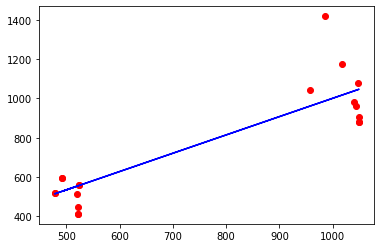

In [73]:
plt.scatter(X,y,color="red")
plt.plot(X_test, predictions, color="blue")

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test,predictions))

MAE: 102.98074325419601
MSE: 14264.654403219876
RMSE: 119.4347286312481
r2_score: 0.8360248714172889


In [75]:
joblib.dump(lm,"Alpha_Plus_C2024.pkl")#only execute if rmse is less than half of mean of productivity

['Alpha_Plus_C2024.pkl']